# Imports

In [1]:
from src.trade_logic.AverageCrossLogic import AverageCrossLogic
from src.models.Trade import Trade
from src.Backtest import Backtest
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

# Backtest

In [2]:
from src.indicators.MovingAverage import MovingAverage
from src.utils.TimeToTrade import TimeToTrade

###################################################################
#                              BACKTEST                           #
###################################################################

## Backtest
input_limit_history=100
plot_reports=False
input_timeframe=Backtest.ENUM_TIMEFRAME_M1

###################################################################
#                               INPUTS                            #
###################################################################

## Trade configurations
input_symbol='WIN$N'
input_qty=1
input_take_stop_calc_type=Trade.ENUM_TAKE_STOP_CALC_TYPE_PTS
input_stop_loss=500
input_take_profit=1000

## Indicators configurations
    # Fast Moving Average
input_fast_ma_calc_type=MovingAverage.ENUM_AVERAGE_TYPE_SMA
input_fast_period=9
    # Slow Moving Average
input_slow_ma_calc_type=MovingAverage.ENUM_AVERAGE_TYPE_SMA
input_slow_period=20

## Time to trade configurations
input_time_to_open_trades='09:00:00'
input_time_to_stop_opening_trades='15:00:00'
input_time_to_close_trades='17:00:00'

###################################################################

# Build trade logic
tl = AverageCrossLogic(input_qty,ENUM_TAKE_STOP_CALC_TYPE=input_take_stop_calc_type,stop_loss=input_stop_loss,take_profit=input_take_profit,
    INPUTS=AverageCrossLogic.INPUTS(
        fast_ma_inputs=MovingAverage.INPUTS(input_fast_ma_calc_type,input_fast_period),
        slow_ma_inputs=MovingAverage.INPUTS(input_slow_ma_calc_type,input_slow_period),
        trading_time=TimeToTrade(input_time_to_open_trades, input_time_to_stop_opening_trades, input_time_to_close_trades)
    )
)

# Call backtest
bt = Backtest(symbol=input_symbol,ENUM_TIMEFRAME=input_timeframe,trade_logic=tl,plot_report=plot_reports,limit_history=input_limit_history)

# Run backtest
if bt: trades=bt.run()

Connect Sucessfully (500, 4040, '20 Oct 2023')


# Report


					Trading test (WIN$N) backtest:

Gross profit: 			 2352130.0			Winner trades: 		 8049
Gross loss: 			 -2289050.0			Losing trades: 		 14655
Largest profit trade:		 1000.0				Largest loss trade:	 -500.0
Average profit trade: 		 292.23				Average loss trade: 	 -156.2 

Profit trades (% of total): 	 35.17 %

Profit factor: 			 1.03
Sharpe Ratio: 			 0.01
Profit/Loss: 			 1.87
Total Net profit: 		 63080.0
Percentual return: 		 149.62 %

Number of trades: 		 22889
Bought trades: 			 11483
Sold trades: 			 11406 

Balance Drawdown Maximal: 	 42160.0
Balance Drawdown Maximal (%): 	 54.25
Balance Drawdown Maximal Time Range: 2021-02-02 09:25:00  until  2022-10-20 12:23:00


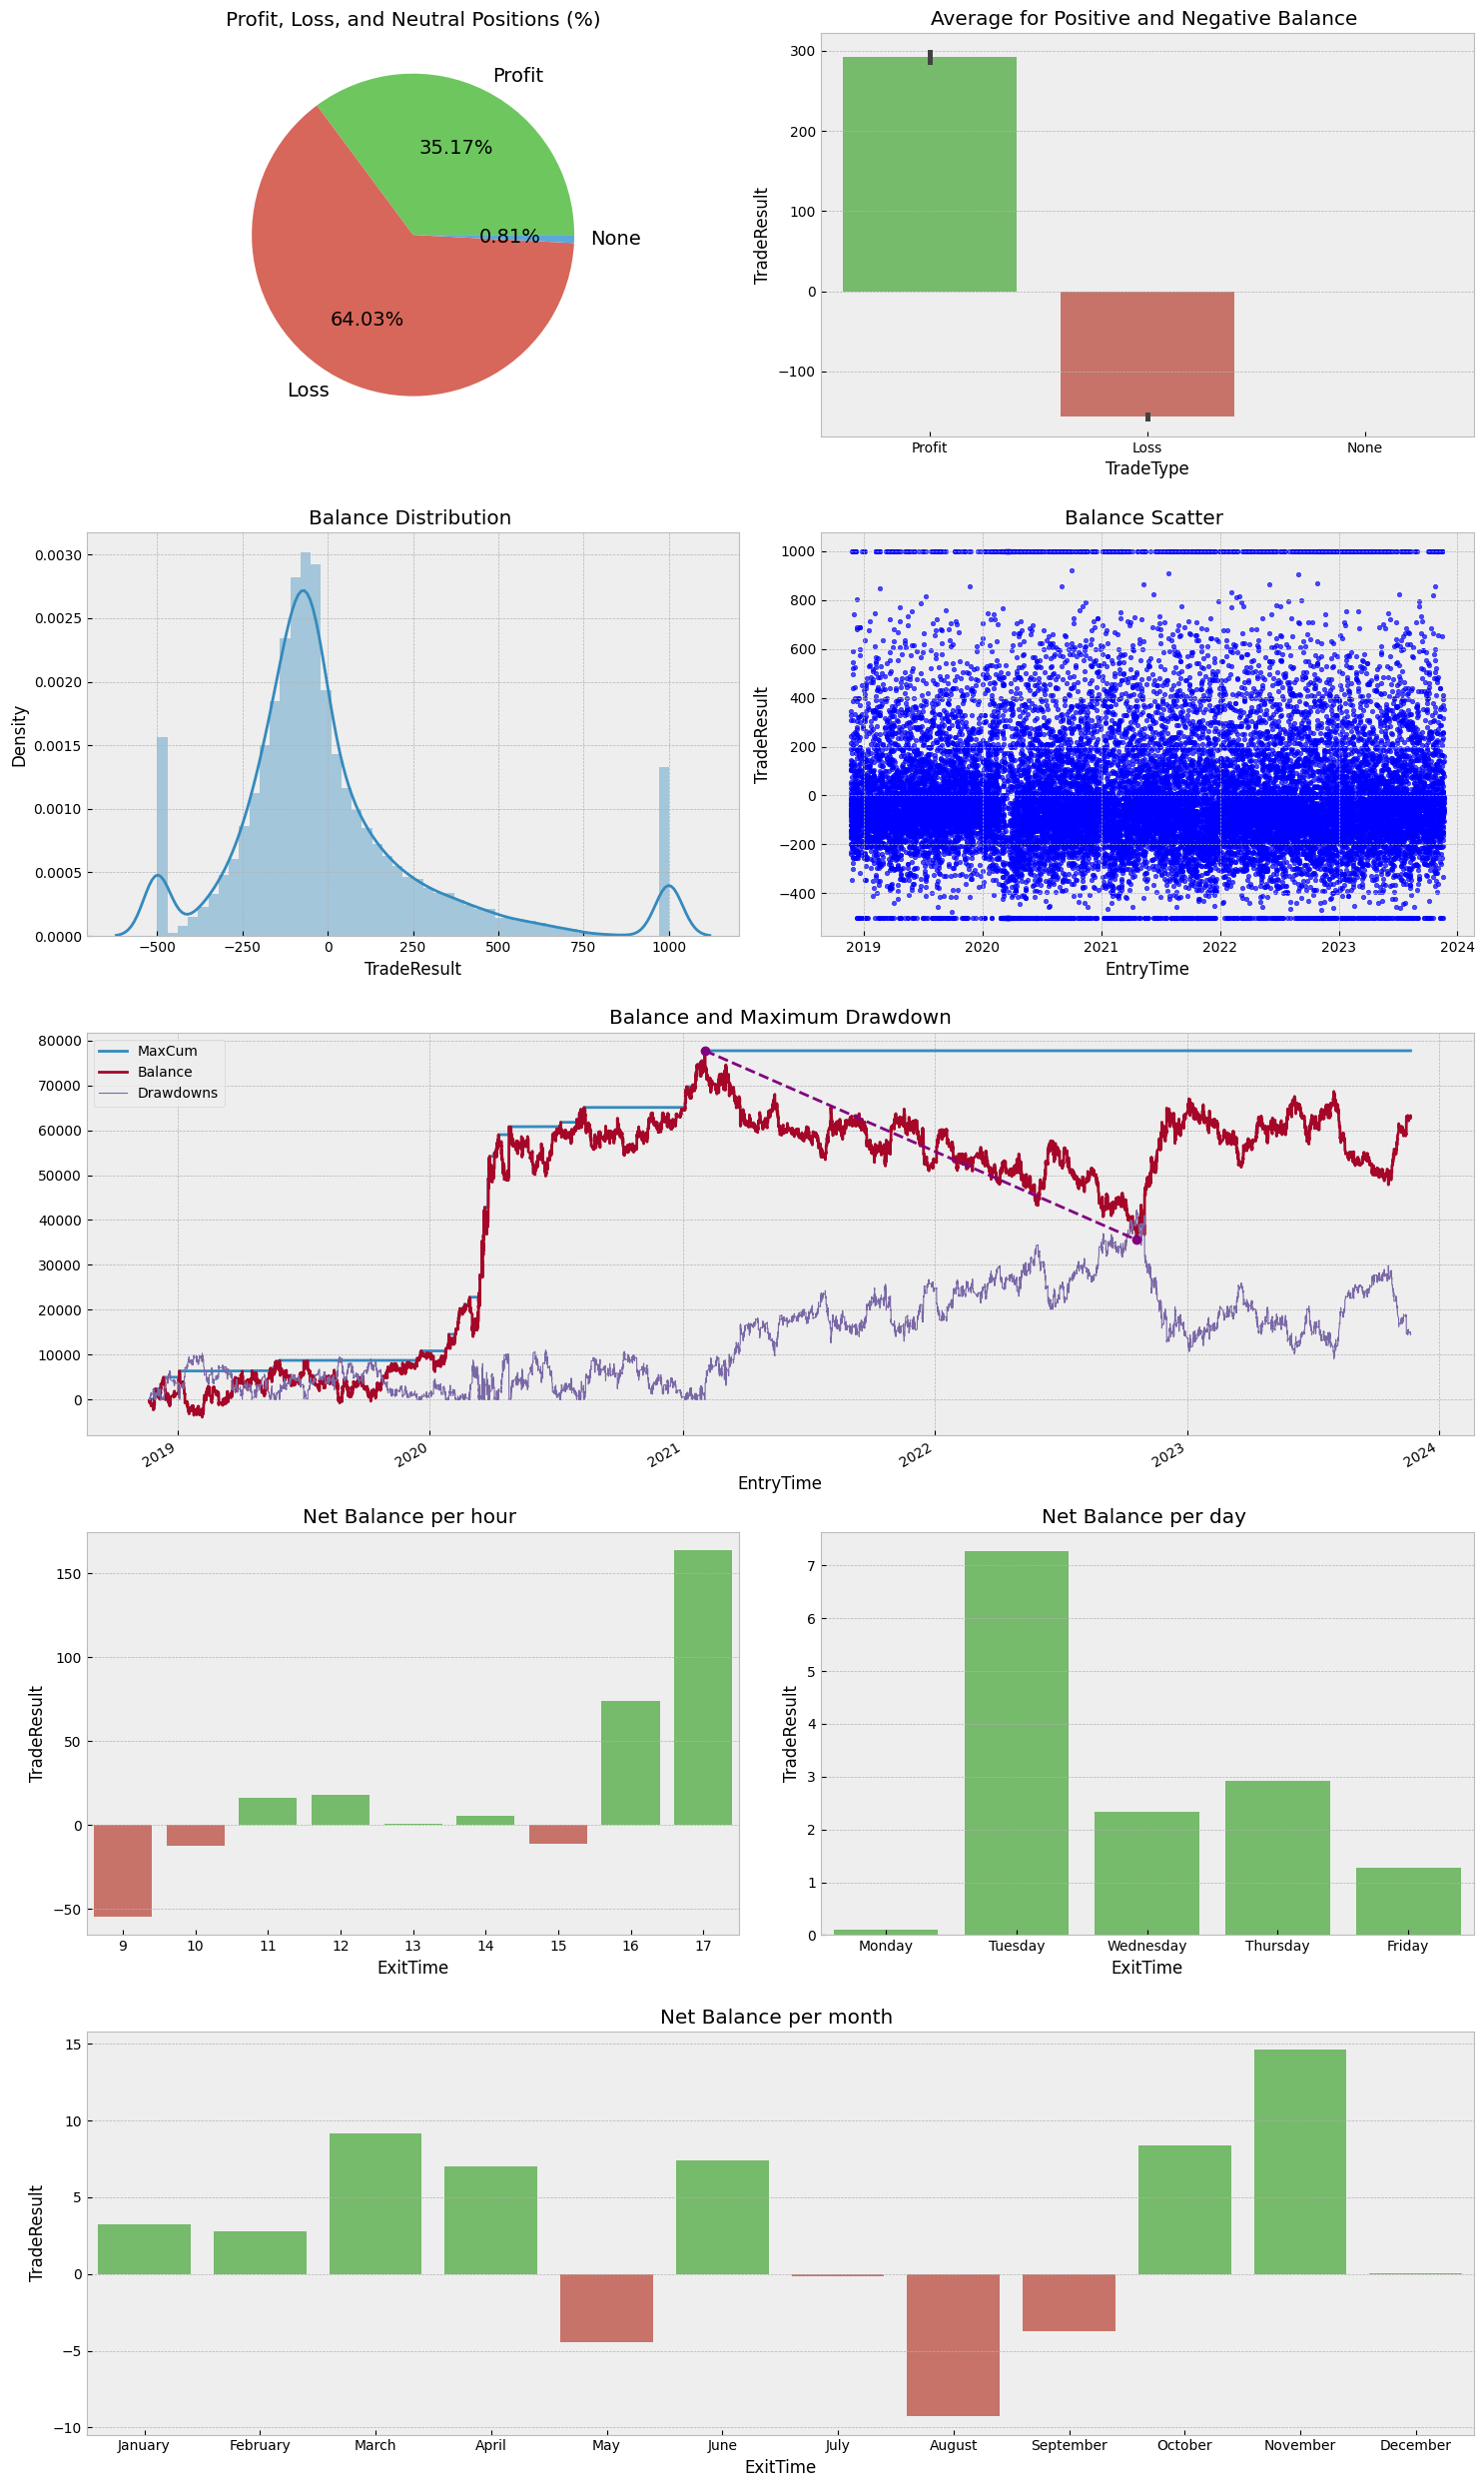

In [3]:
if not plot_reports: bt.get_report_pointer().plot_report()

# Optimizer

In [4]:
from src.optimizer.OptimizeOptions import OptimizeOptions
from src.optimizer.Optimizer import Optimizer

opt=Optimizer(
    symbol=input_symbol,
    ENUM_TIMEFRAME=input_timeframe,
    trade_logic=tl.optimize_possibilities(
        stop_loss=OptimizeOptions.float(300,500,100),
        take_profit=OptimizeOptions.float(500,800,100),
        # slow_ma_calc_type=OptimizeOptions.moving_average_calc_type(),
        # slow_ma_period=OptimizeOptions.int(8,12,1),
        # fast_ma_calc_type=OptimizeOptions.moving_average_calc_type(),
        # fast_ma_period=OptimizeOptions.int(20,30,5),
        # time_to_open_trades=OptimizeOptions.time('09:00:00','10:00:00', 60*30),
        # time_to_stop_open=OptimizeOptions.time('14:00:00','16:00:00', 60*30),
        # time_to_close_trades=OptimizeOptions.time('17:30:00','18:00:00', 60*30)
    ),
    limit_history=100,
    df_to_opt=bt.get_bt_df()
)
opt.run()

Max result

In [5]:
opt.get_max_result_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 400,
 'take_profit': 500,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 9,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 20,
 'time_to_open_trades': '09:00:00',
 'time_to_stop_open': '15:00:00',
 'time_to_close_trades': '17:00:00'}


					Trading opt/4 (WIN$N) backtest:

Gross profit: 			 2937605.0			Winner trades: 		 10110
Gross loss: 			 -2601900.0			Losing trades: 		 16345
Largest profit trade:		 500.0				Largest loss trade:	 -400.0
Average profit trade: 		 290.56				Average loss trade: 	 -159.19 

Profit trades (% of total): 	 37.92 %

Profit factor: 			 1.13
Sharpe Ratio: 			 0.05
Profit/Loss: 			 1.83
Total Net profit: 		 335705.0
Percentual return: 		 2789.41 %

Number of trades: 		 26661
Bought trades: 			 13359
Sold trades: 			 13302 

Balance Drawdown Maximal: 	 12035.0
Balance Drawdown Maximal (%): 	 3.61
Balance Drawdown Maximal Time Range: 2023-08-01 14:06:00  until  2023-10-19 11:50:00


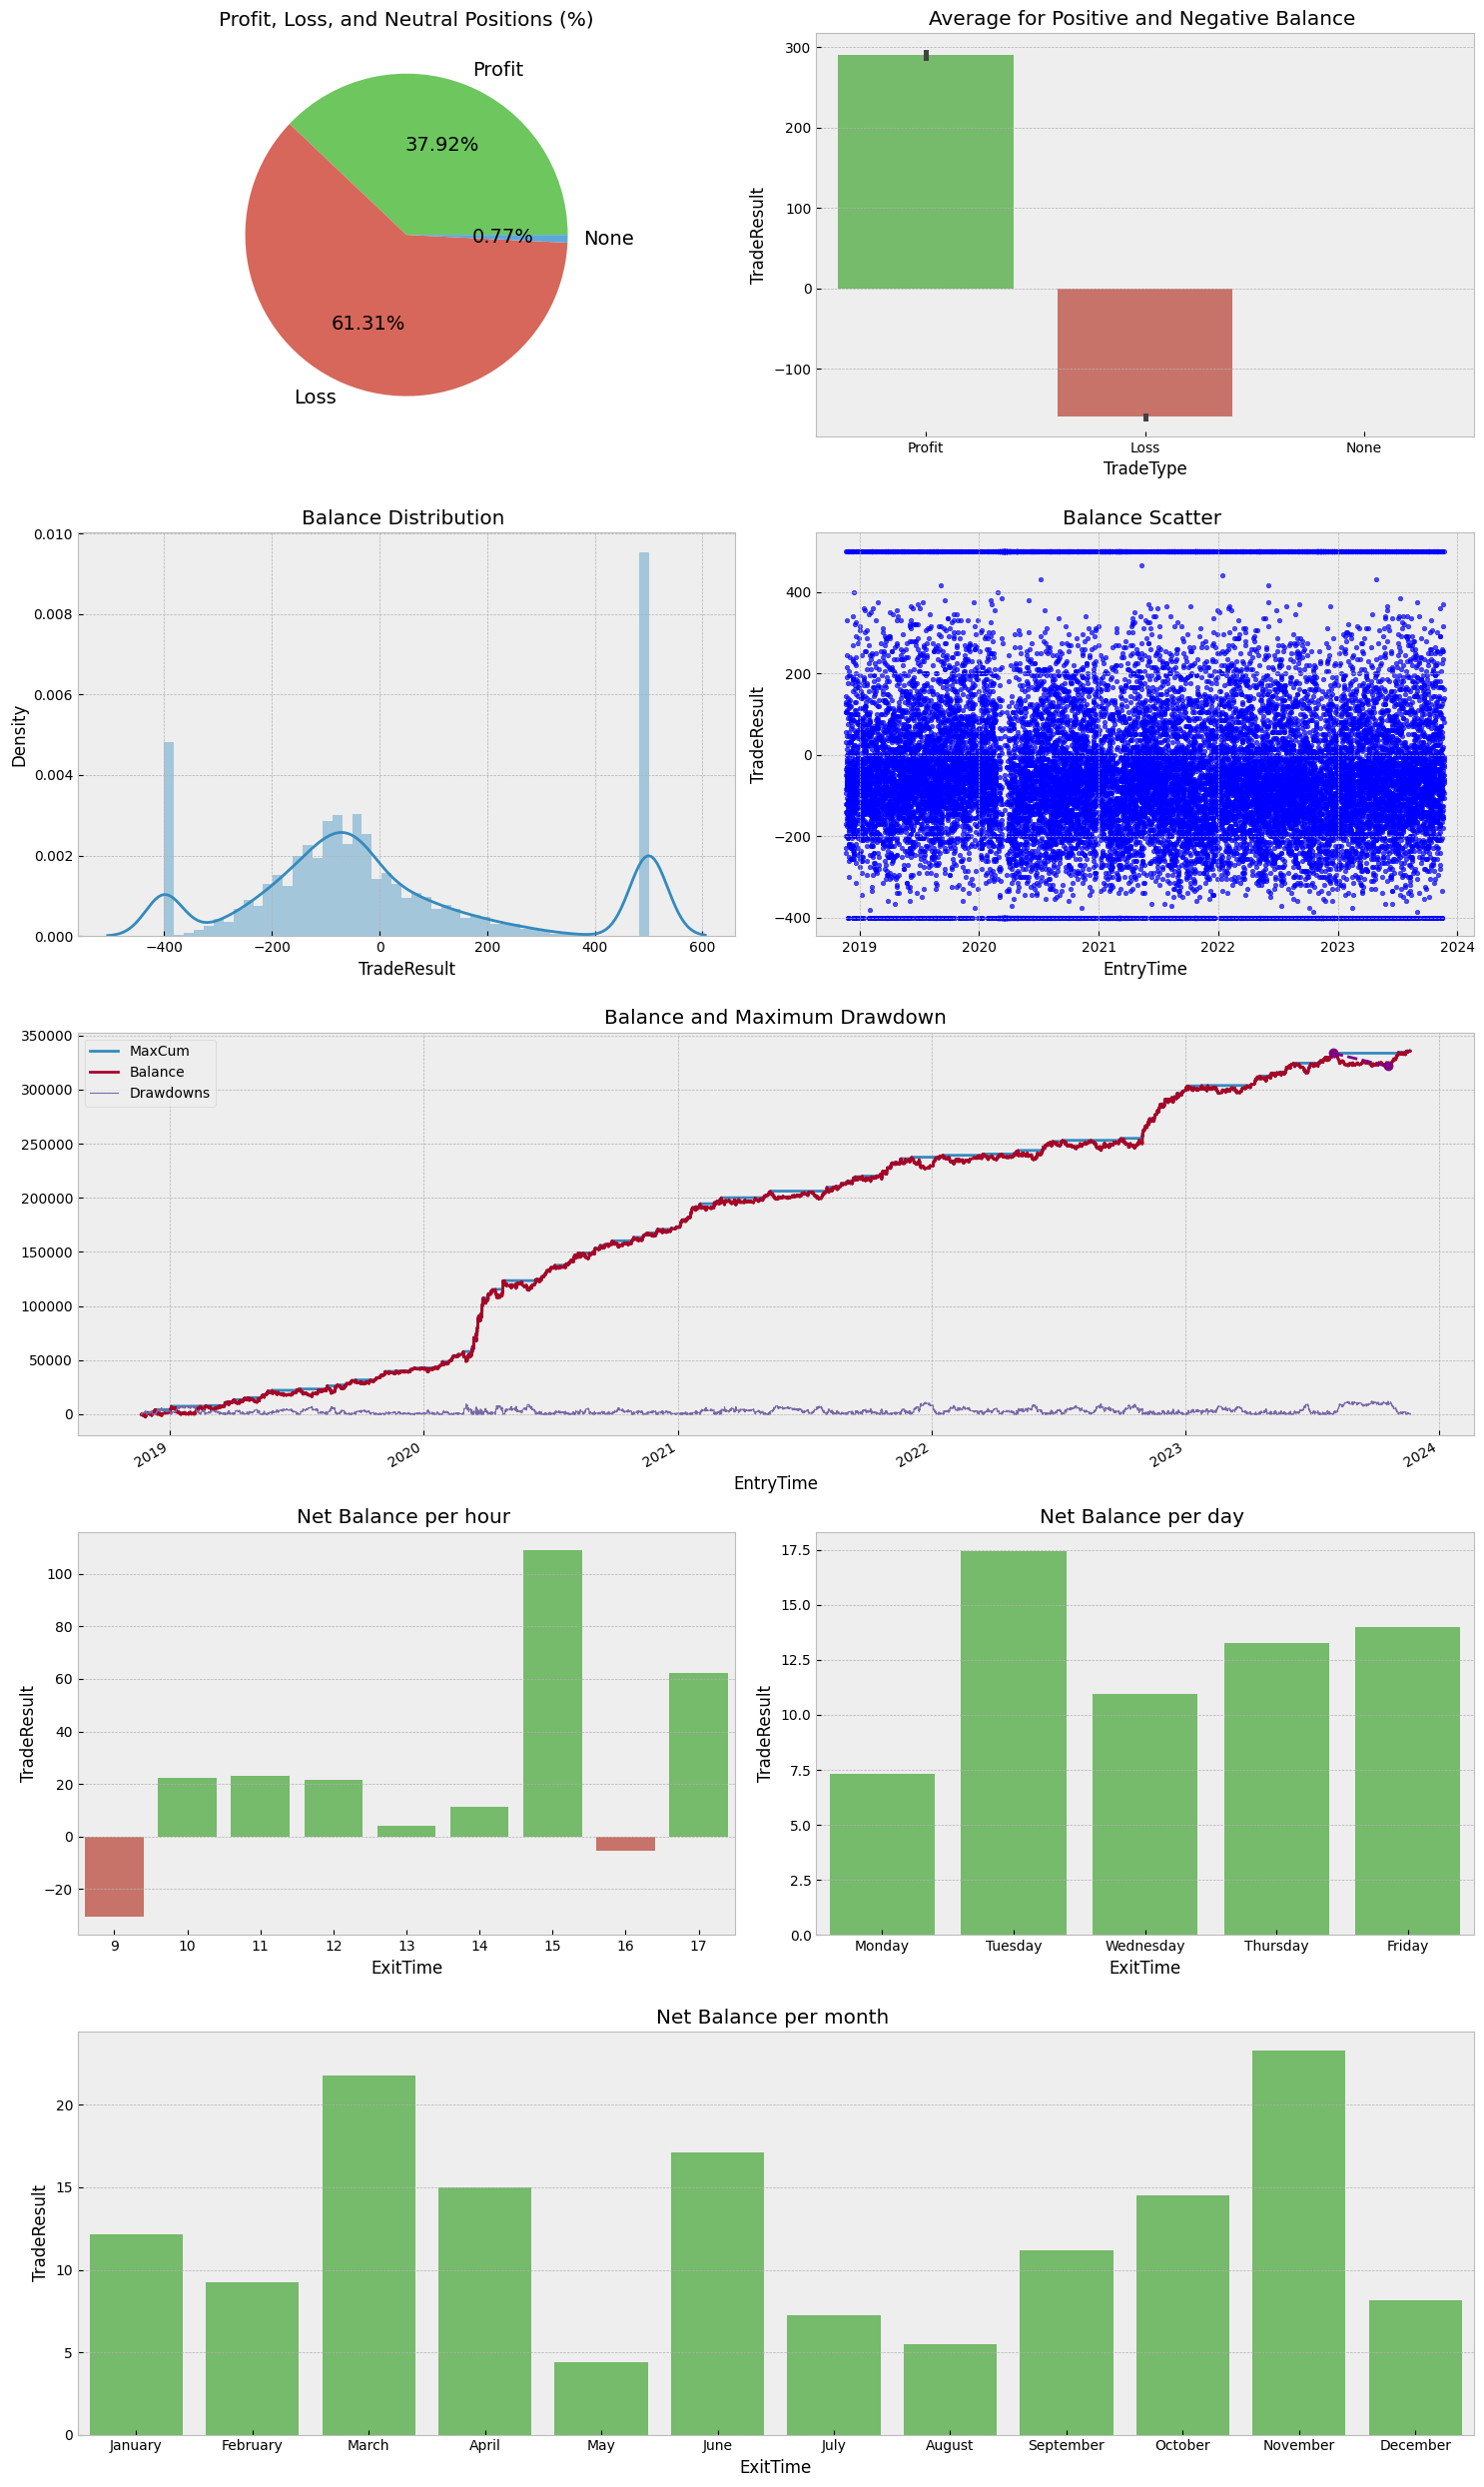

In [6]:
opt.get_max_result_bt()['bt'].get_report_pointer().plot_report()

Min drawdown

In [7]:
opt.get_min_drawdown_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 400,
 'take_profit': 500,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 9,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 20,
 'time_to_open_trades': '09:00:00',
 'time_to_stop_open': '15:00:00',
 'time_to_close_trades': '17:00:00'}


					Trading opt/4 (WIN$N) backtest:

Gross profit: 			 2937605.0			Winner trades: 		 10110
Gross loss: 			 -2601900.0			Losing trades: 		 16345
Largest profit trade:		 500.0				Largest loss trade:	 -400.0
Average profit trade: 		 290.56				Average loss trade: 	 -159.19 

Profit trades (% of total): 	 37.92 %

Profit factor: 			 1.13
Sharpe Ratio: 			 0.05
Profit/Loss: 			 1.83
Total Net profit: 		 335705.0
Percentual return: 		 2789.41 %

Number of trades: 		 26661
Bought trades: 			 13359
Sold trades: 			 13302 

Balance Drawdown Maximal: 	 12035.0
Balance Drawdown Maximal (%): 	 3.61
Balance Drawdown Maximal Time Range: 2023-08-01 14:06:00  until  2023-10-19 11:50:00


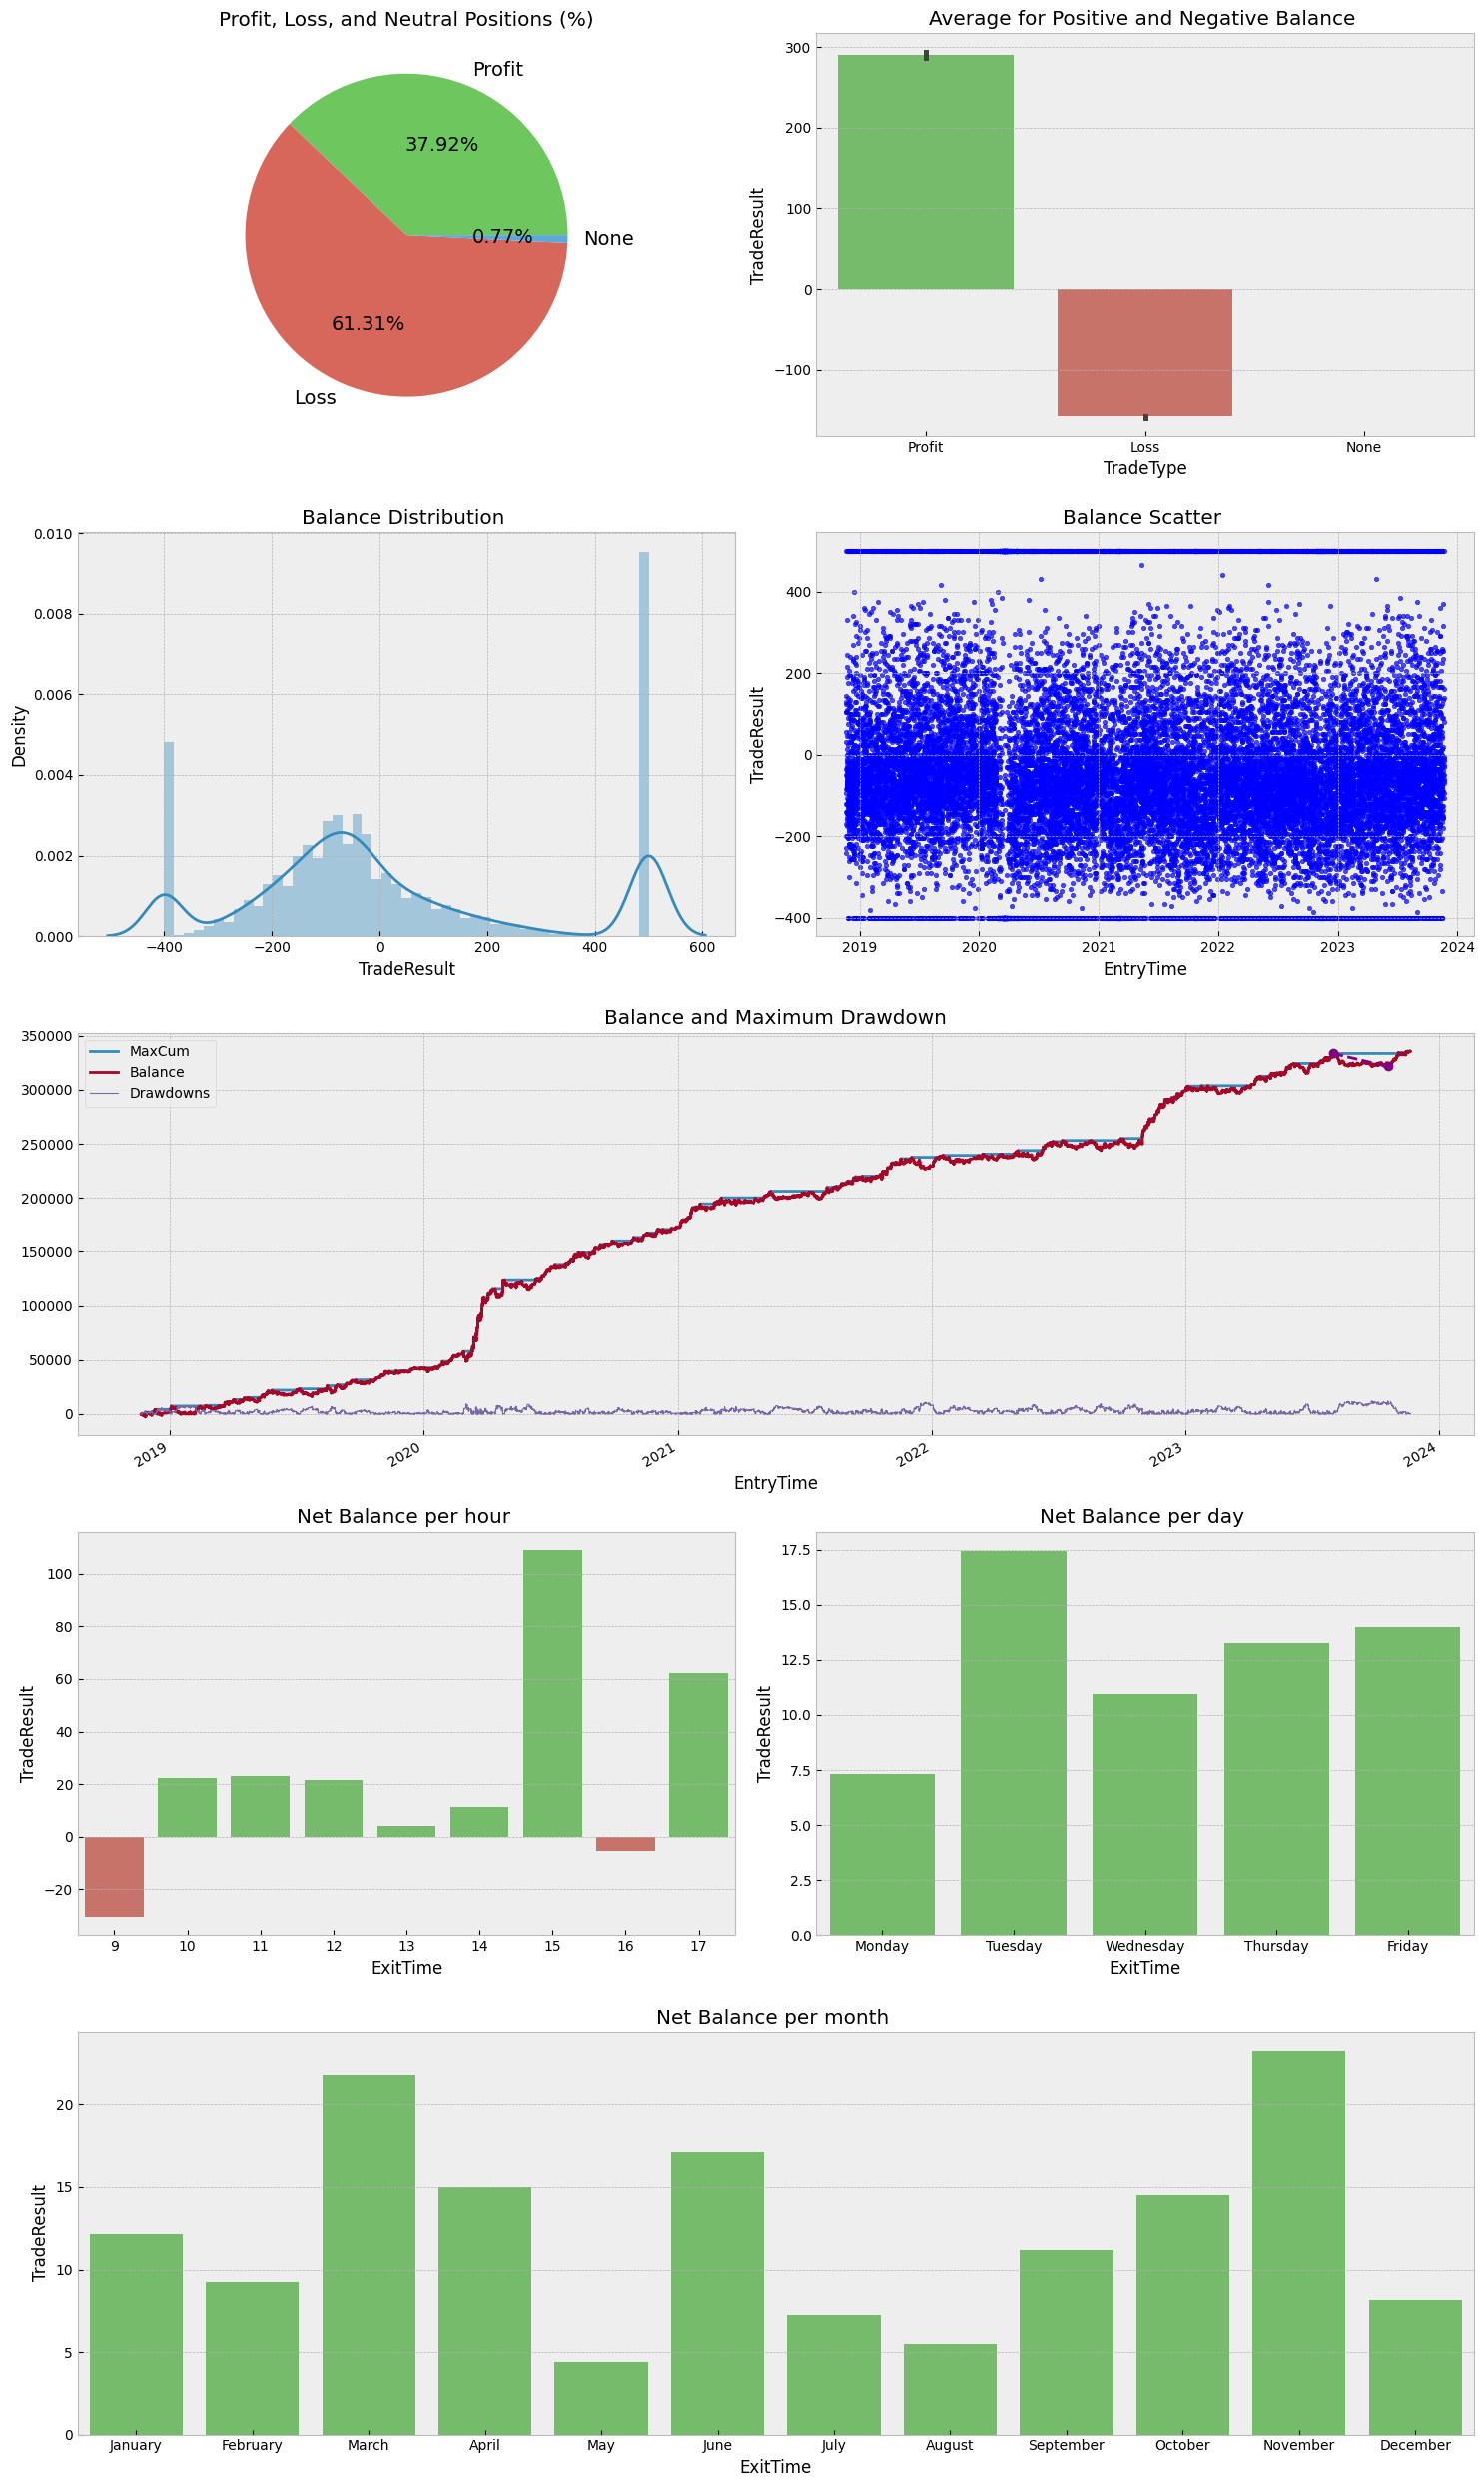

In [8]:
opt.get_min_drawdown_bt()['bt'].get_report_pointer().plot_report()

Max Sharpe Ratio

In [9]:
opt.get_max_sharpe_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 400,
 'take_profit': 500,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 9,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 20,
 'time_to_open_trades': '09:00:00',
 'time_to_stop_open': '15:00:00',
 'time_to_close_trades': '17:00:00'}


					Trading opt/4 (WIN$N) backtest:

Gross profit: 			 2937605.0			Winner trades: 		 10110
Gross loss: 			 -2601900.0			Losing trades: 		 16345
Largest profit trade:		 500.0				Largest loss trade:	 -400.0
Average profit trade: 		 290.56				Average loss trade: 	 -159.19 

Profit trades (% of total): 	 37.92 %

Profit factor: 			 1.13
Sharpe Ratio: 			 0.05
Profit/Loss: 			 1.83
Total Net profit: 		 335705.0
Percentual return: 		 2789.41 %

Number of trades: 		 26661
Bought trades: 			 13359
Sold trades: 			 13302 

Balance Drawdown Maximal: 	 12035.0
Balance Drawdown Maximal (%): 	 3.61
Balance Drawdown Maximal Time Range: 2023-08-01 14:06:00  until  2023-10-19 11:50:00


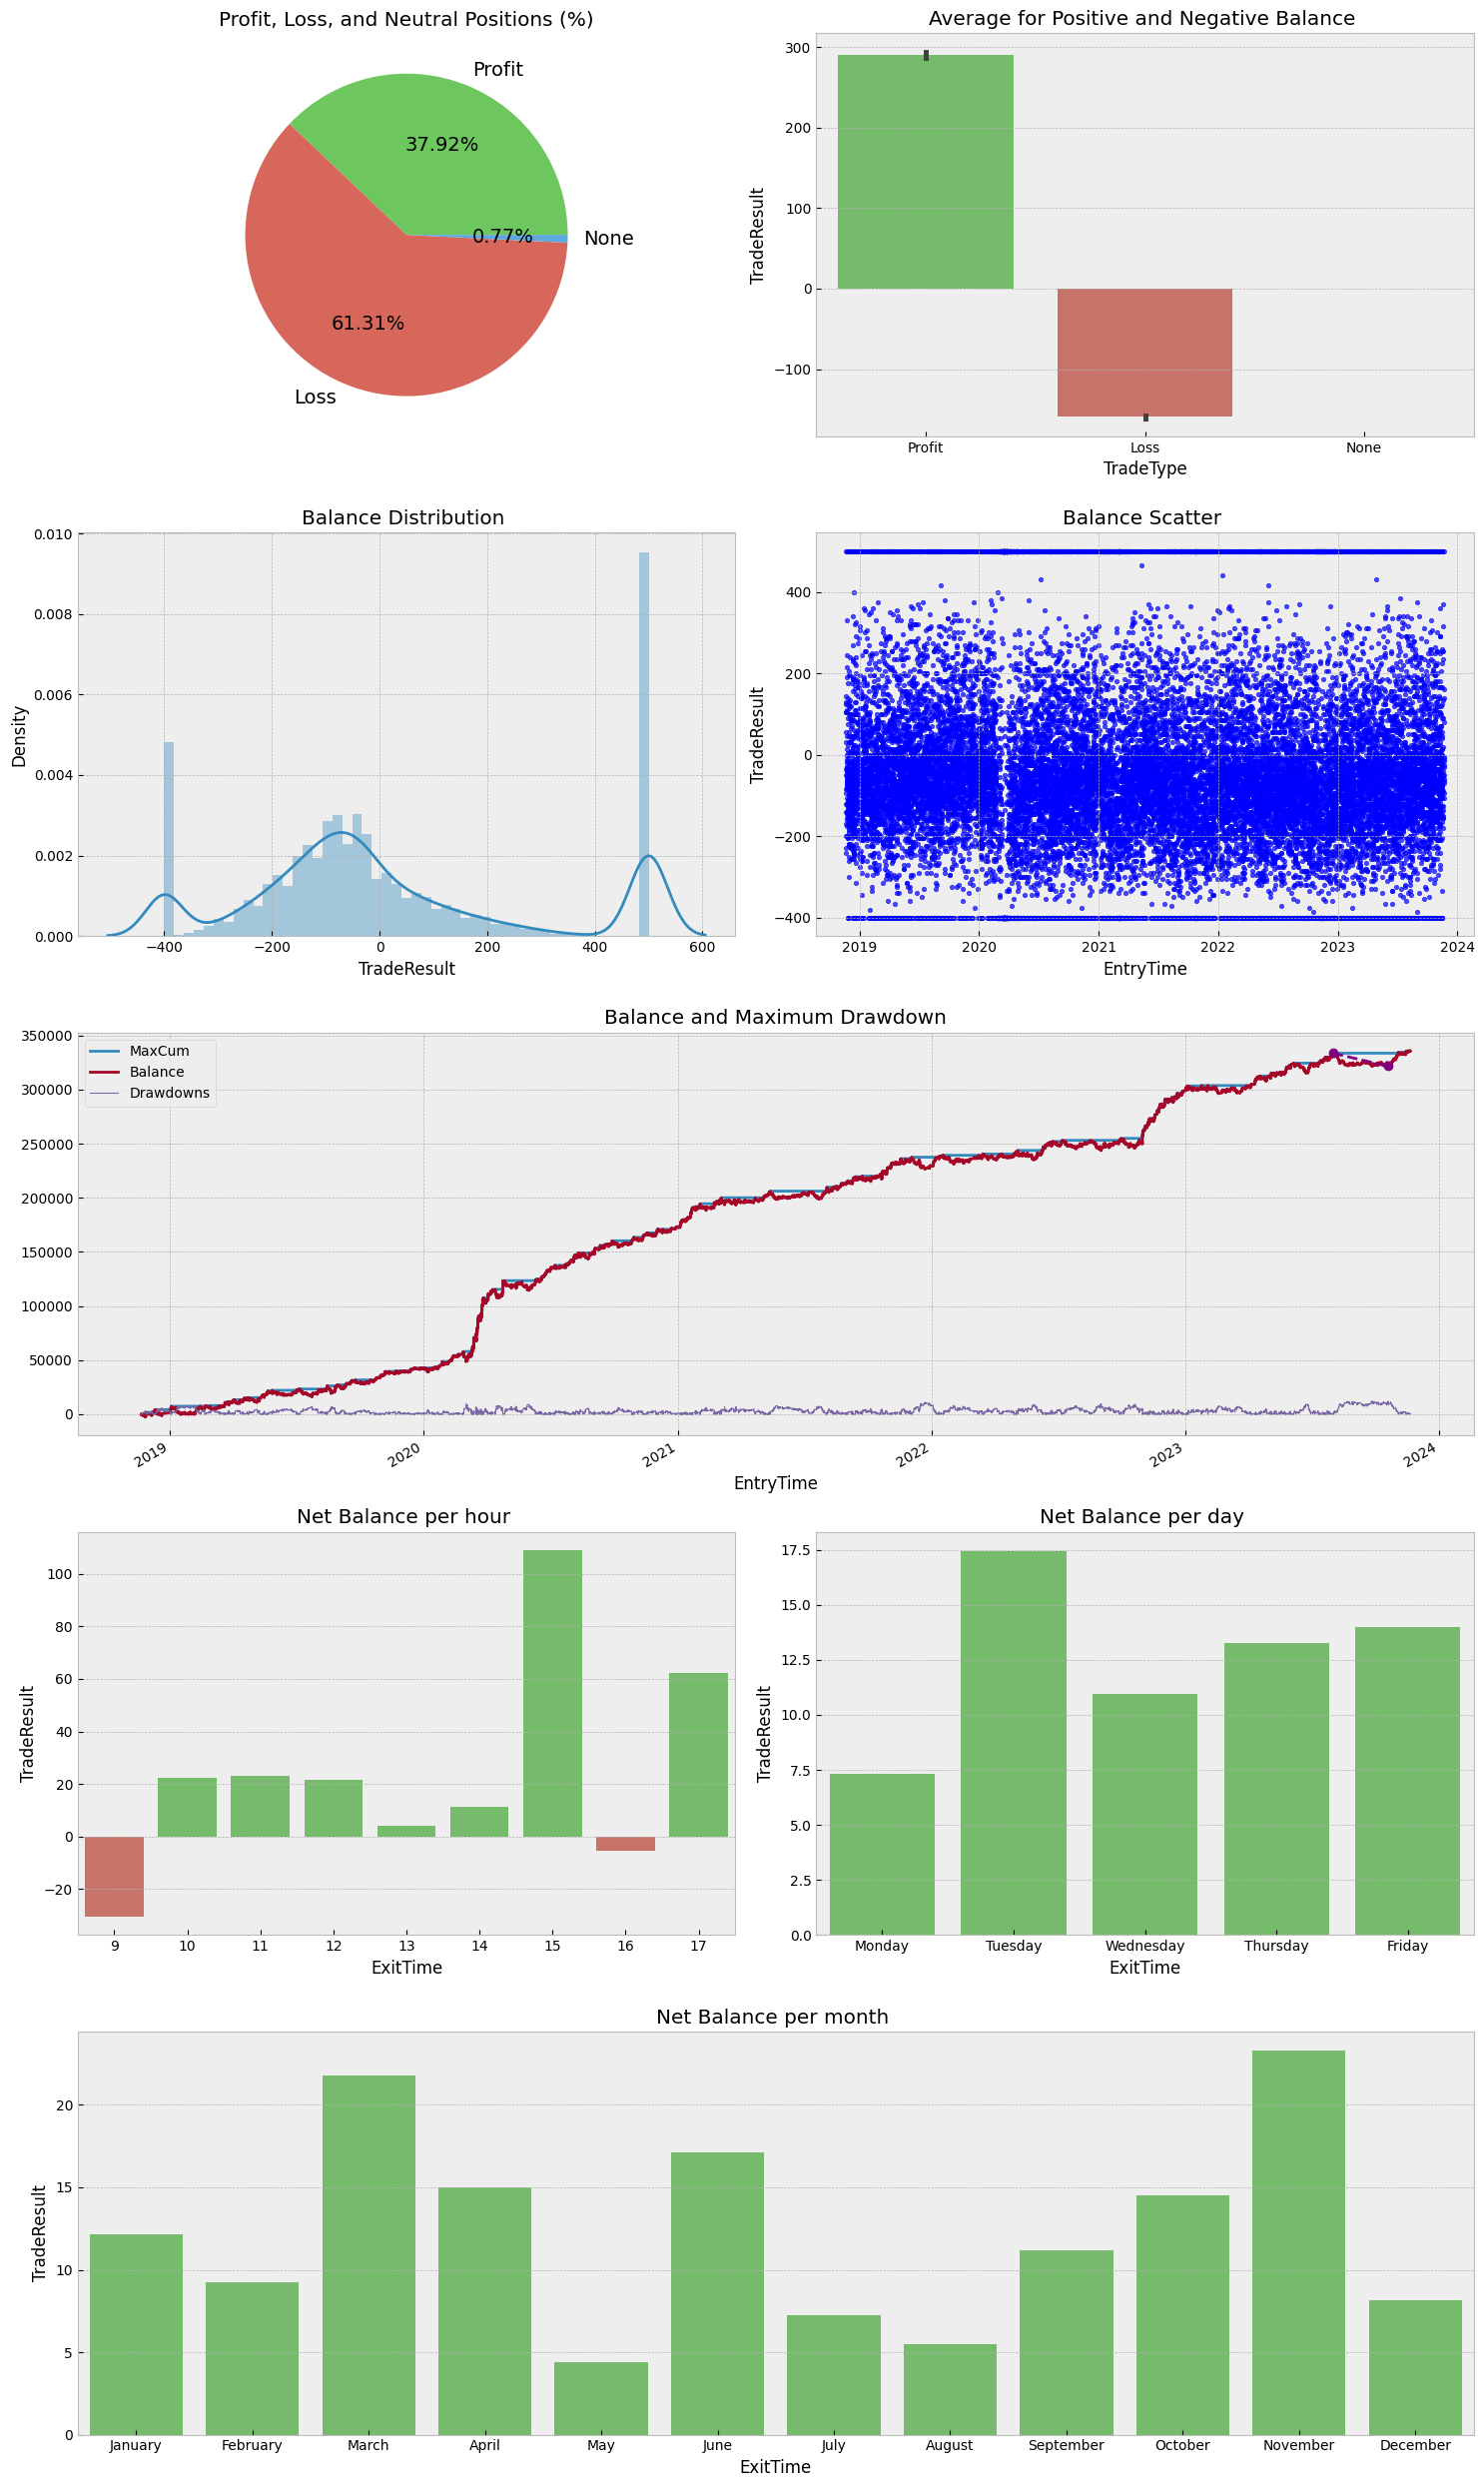

In [10]:
opt.get_max_sharpe_bt()['bt'].get_report_pointer().plot_report()

Max profit factor

In [11]:
opt.get_max_profit_factor_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 400,
 'take_profit': 500,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 9,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 20,
 'time_to_open_trades': '09:00:00',
 'time_to_stop_open': '15:00:00',
 'time_to_close_trades': '17:00:00'}


					Trading opt/4 (WIN$N) backtest:

Gross profit: 			 2937605.0			Winner trades: 		 10110
Gross loss: 			 -2601900.0			Losing trades: 		 16345
Largest profit trade:		 500.0				Largest loss trade:	 -400.0
Average profit trade: 		 290.56				Average loss trade: 	 -159.19 

Profit trades (% of total): 	 37.92 %

Profit factor: 			 1.13
Sharpe Ratio: 			 0.05
Profit/Loss: 			 1.83
Total Net profit: 		 335705.0
Percentual return: 		 2789.41 %

Number of trades: 		 26661
Bought trades: 			 13359
Sold trades: 			 13302 

Balance Drawdown Maximal: 	 12035.0
Balance Drawdown Maximal (%): 	 3.61
Balance Drawdown Maximal Time Range: 2023-08-01 14:06:00  until  2023-10-19 11:50:00


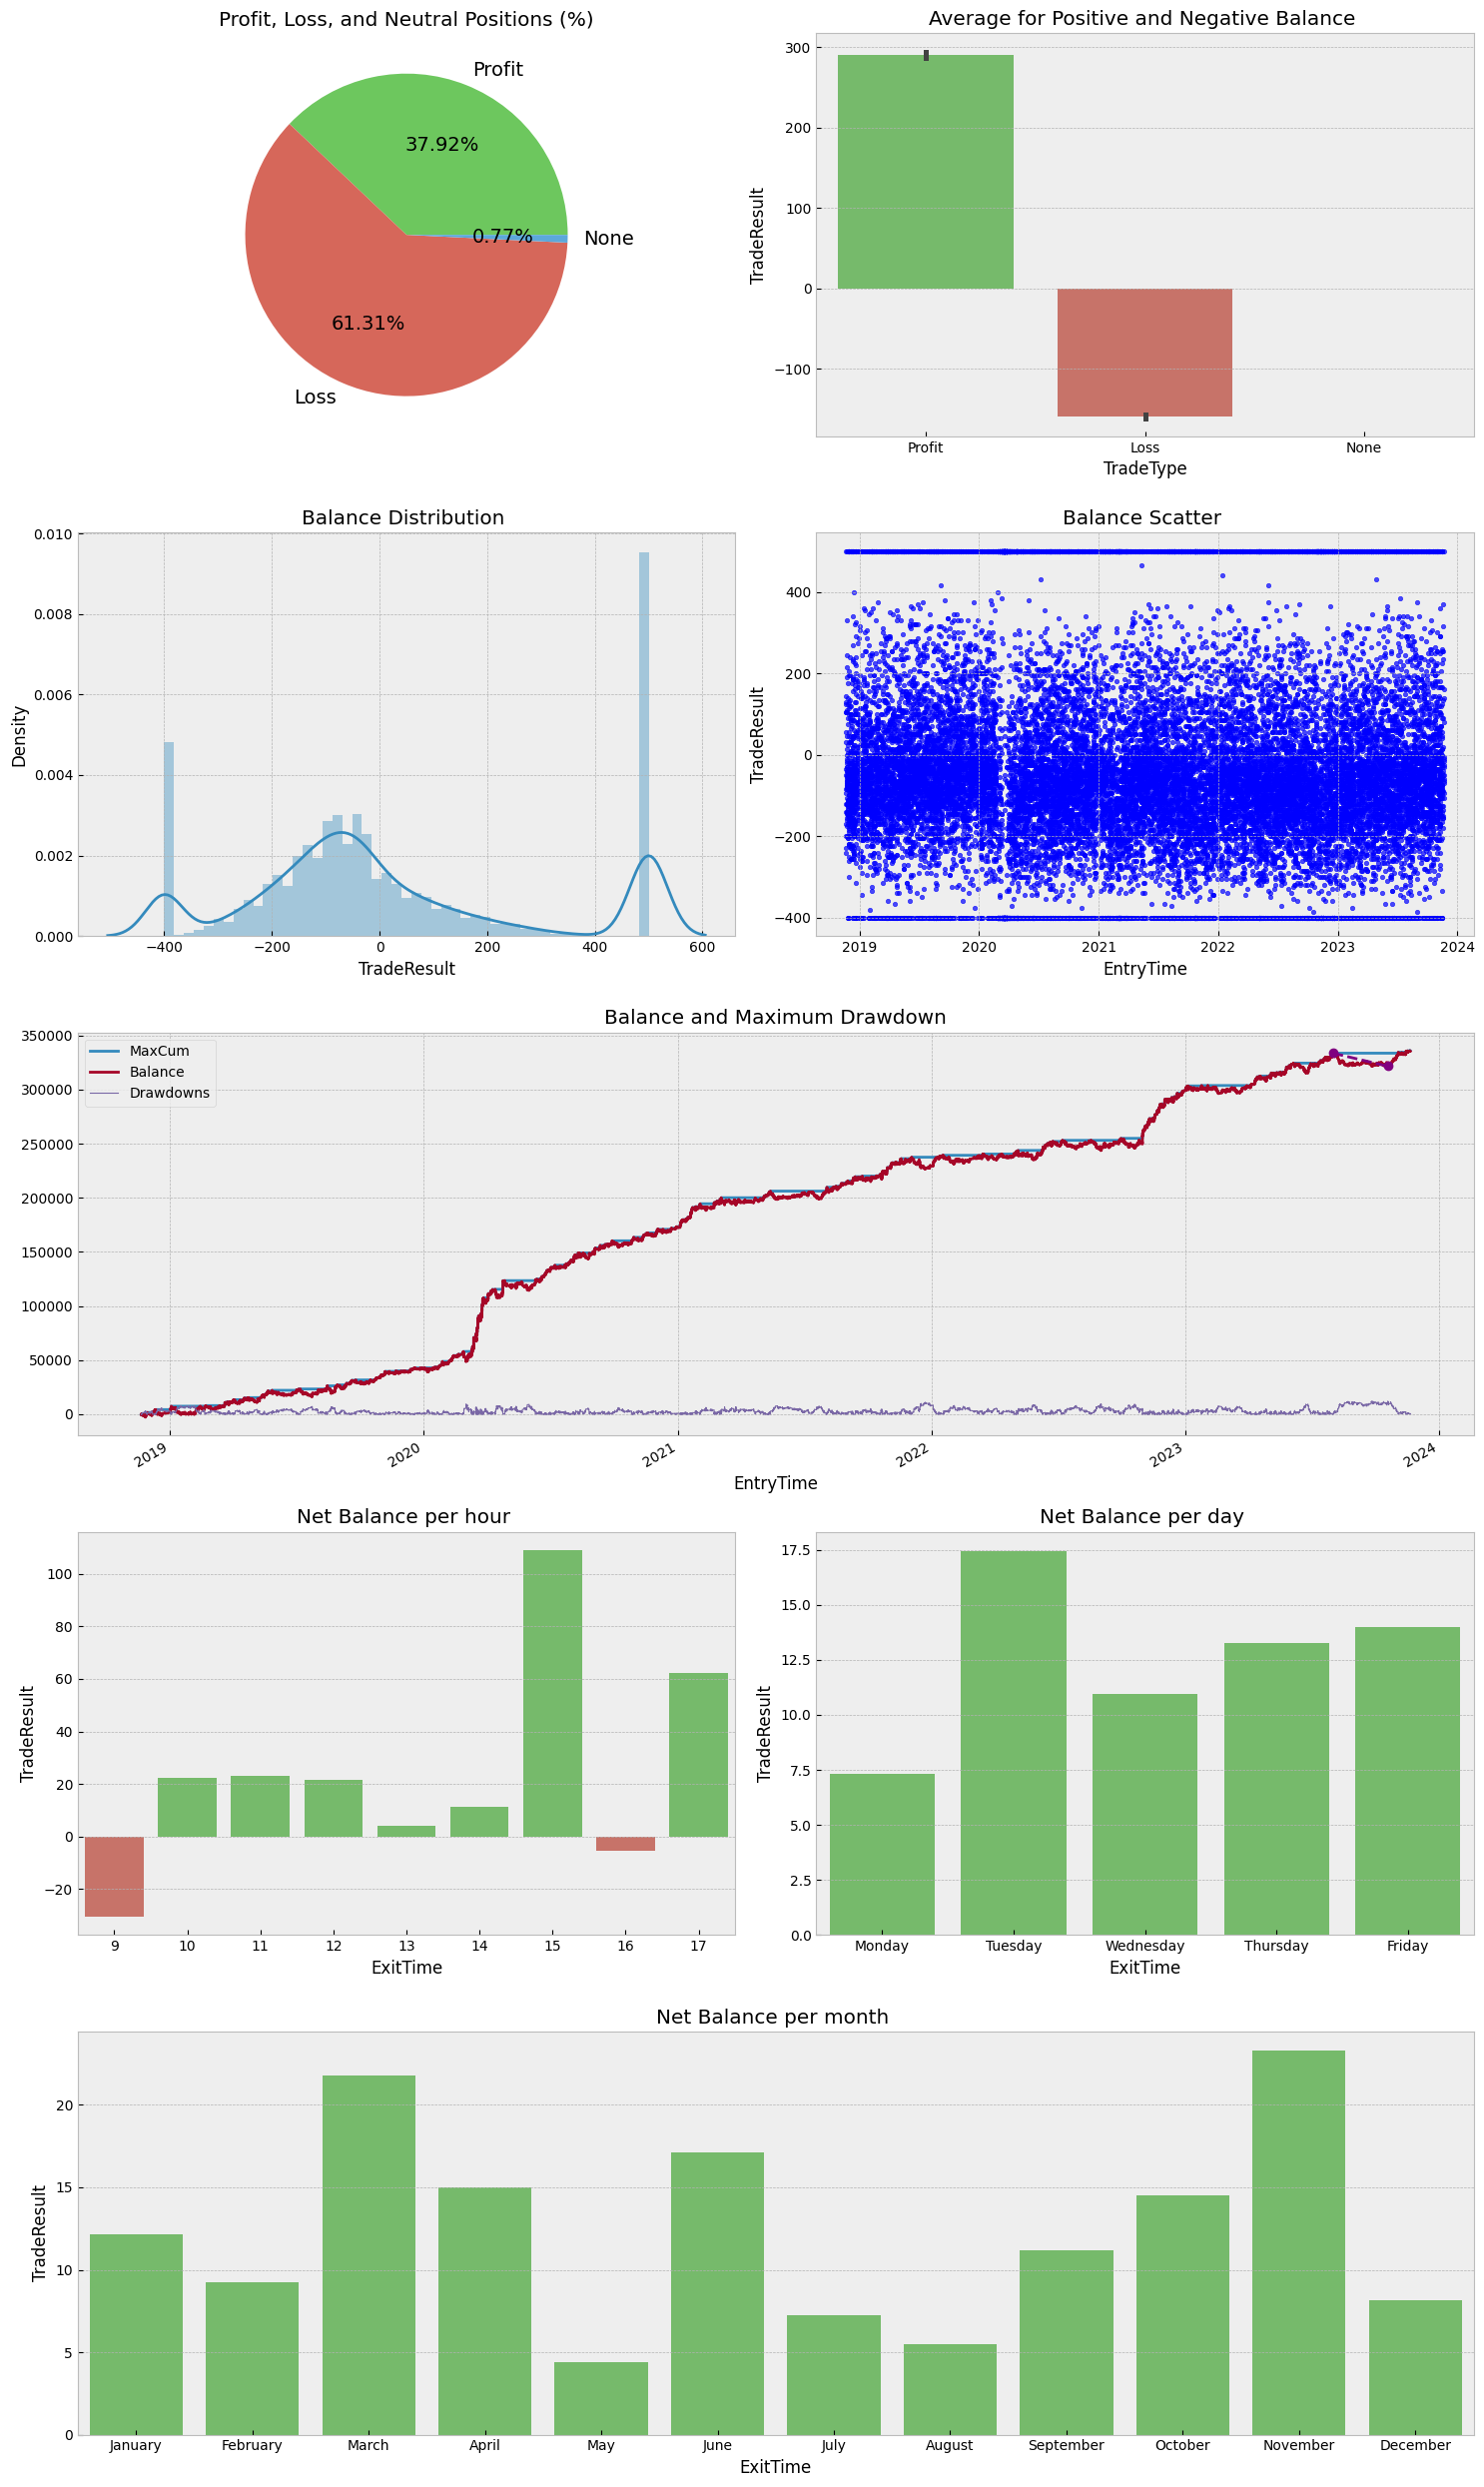

In [12]:
opt.get_max_profit_factor_bt()['bt'].get_report_pointer().plot_report()